# Importando as bibliotecas necessárias

Nesse projeto, será abordado estudos de manipualação e visualização de dados em gráficos usando o pandas e o seaborn

In [152]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [74]:
dados = pd.read_csv("gorjetas.csv", sep=",")
dados

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4
...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3
240,27.18,2.00,Yes,Sat,Dinner,2
241,22.67,2.00,Yes,Sat,Dinner,2
242,17.82,1.75,No,Sat,Dinner,2


## Analisando a estrutura do dataframe

In [75]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   dessert     244 non-null    object 
 3   day         244 non-null    object 
 4   time        244 non-null    object 
 5   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 11.6+ KB


In [76]:
#Analisando variáveis quantitativas
dados.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [77]:
#Tamanho do dataframe
dados.shape #(linhas, colunas)

(244, 6)

In [78]:
print("Tamanho da base de dados: ", dados.shape)
print("Quantidade de registros não nulos")
dados.count()

Tamanho da base de dados:  (244, 6)
Quantidade de registros não nulos


total_bill    244
tip           244
dessert       244
day           244
time          244
size          244
dtype: int64

## Renomeando as colunas

In [79]:
dados.columns

Index(['total_bill', 'tip', 'dessert', 'day', 'time', 'size'], dtype='object')

In [80]:
dados.rename(columns={'total_bill': 'total_conta', 'tip':'gorjeta', 'dessert':'sobremesa', 'day':'dia_semana', 'time': 'hora',
                      'size':'qnt.pessoas'}, inplace = True)

dados

,total_conta,gorjeta,sobremesa,dia_semana,hora,qnt.pessoas
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4
...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3
240,27.18,2.00,Yes,Sat,Dinner,2
241,22.67,2.00,Yes,Sat,Dinner,2
242,17.82,1.75,No,Sat,Dinner,2


## Renomeando os valores categóricos

Para isso, vamos utilizar a função map()

### Analisando a coluna sobremesa

In [81]:
dados.sobremesa.unique()

array(['No', 'Yes'], dtype=object)

In [82]:
yes_no = {'No':'Não', 'Yes':'Sim'}
dados.sobremesa.map(yes_no)

0      Não
1      Não
2      Não
3      Não
4      Não
      ... 
239    Não
240    Sim
241    Sim
242    Não
243    Não
Name: sobremesa, Length: 244, dtype: object

In [83]:
dados.sobremesa = dados.sobremesa.map(yes_no)
dados.head(1)

,total_conta,gorjeta,sobremesa,dia_semana,hora,qnt.pessoas
0,16.99,1.01,Não,Sun,Dinner,2


### Analisando a coluna dia_semana

In [84]:
dados.dia_semana.unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [85]:
dia = {
    'Sun':'Domingo',
    'Sat':'Sábado',
    'Thur':'Quinta', 
    'Fri':'Sexta'
}

dados.dia_semana = dados.dia_semana.map(dia)
dados.head(1)

,total_conta,gorjeta,sobremesa,dia_semana,hora,qnt.pessoas
0,16.99,1.01,Não,Domingo,Dinner,2


### Analisando a coluna hora

In [86]:
dados.hora.unique()

array(['Dinner', 'Lunch'], dtype=object)

In [87]:
horario = {
    'Dinner':'Janta', 
    'Lunch':'Almoço'
}

dados.hora = dados.hora.map(horario)
dados.head(1)

,total_conta,gorjeta,sobremesa,dia_semana,hora,qnt.pessoas
0,16.99,1.01,Não,Domingo,Janta,2


# Plotando gráficos

O seaborn é uma "evolução" do matplotlib trabalhando com core.dataframe. Os gráficos no seaborn são mais robustos e sofisticados, melhorando a experiência do cientista na visualização dos dados

Documentação: https://seaborn.pydata.org/

## Análise 1 - Correlação entre gorjeta e valor da conta

Text(0.5, 0.98, 'Valor da Conta x Valor da Gorjeta')

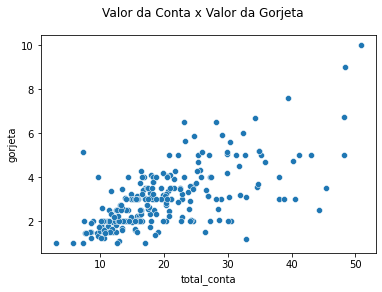

In [88]:
#Utilizando o gráfico de pontos (scatterplot) -> scatterplot(eixo_x, eixo_y, base_de_dados)
valor_gorjeta = sns.scatterplot(x='total_conta', y='gorjeta', data = dados)
valor_gorjeta.figure.suptitle('Valor da Conta x Valor da Gorjeta')

Podemos inferir que quanto maior o valor da conta, maior é o valor da gorjeta

## Análise 2 - Correlação quantitativa entre o valor da conta e a gorjeta

In [89]:
#Criando uma nova coluna
dados['porcentagem_gorjeta'] = ""
dados

,total_conta,gorjeta,sobremesa,dia_semana,hora,qnt.pessoas,porcentagem_gorjeta
0,16.99,1.01,Não,Domingo,Janta,2,
1,10.34,1.66,Não,Domingo,Janta,3,
2,21.01,3.50,Não,Domingo,Janta,3,
3,23.68,3.31,Não,Domingo,Janta,2,
4,24.59,3.61,Não,Domingo,Janta,4,
...,...,...,...,...,...,...,...
239,29.03,5.92,Não,Sábado,Janta,3,
240,27.18,2.00,Sim,Sábado,Janta,2,
241,22.67,2.00,Sim,Sábado,Janta,2,
242,17.82,1.75,Não,Sábado,Janta,2,


In [90]:
dados['porcentagem_gorjeta'] = round((dados['gorjeta'] / dados['total_conta']), 2)
dados

,total_conta,gorjeta,sobremesa,dia_semana,hora,qnt.pessoas,porcentagem_gorjeta
0,16.99,1.01,Não,Domingo,Janta,2,0.06
1,10.34,1.66,Não,Domingo,Janta,3,0.16
2,21.01,3.50,Não,Domingo,Janta,3,0.17
3,23.68,3.31,Não,Domingo,Janta,2,0.14
4,24.59,3.61,Não,Domingo,Janta,4,0.15
...,...,...,...,...,...,...,...
239,29.03,5.92,Não,Sábado,Janta,3,0.20
240,27.18,2.00,Sim,Sábado,Janta,2,0.07
241,22.67,2.00,Sim,Sábado,Janta,2,0.09
242,17.82,1.75,Não,Sábado,Janta,2,0.10


### Analisando a correlação graficamente

<AxesSubplot:xlabel='total_conta', ylabel='porcentagem_gorjeta'>

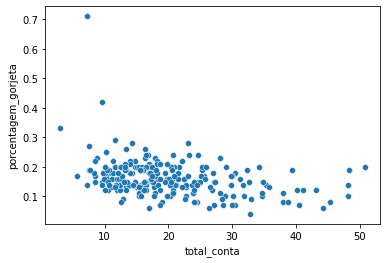

In [91]:
sns.scatterplot(x='total_conta', y='porcentagem_gorjeta', data = dados)

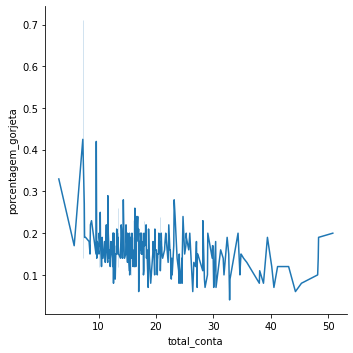

In [92]:
#Utilizando o relplot() onde pode escolher o tipo de gráfico a ser utilizado
sns.relplot(x='total_conta', y='porcentagem_gorjeta', kind='line', data = dados)

Text(0.5, 0.98, 'Total da Conta x % gorjeta')

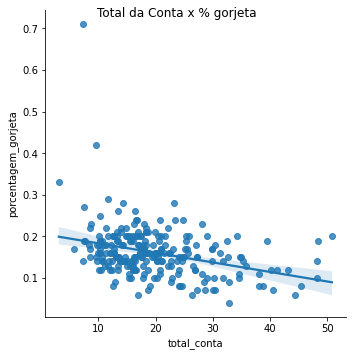

In [93]:
#Utilizando o lmplot que mostra um modelo de regressão linear
lm_plot = sns.lmplot(x='total_conta', y='porcentagem_gorjeta', data = dados)
lm_plot.figure.suptitle('Total da Conta x % gorjeta')

Pode-se inferir que quanto maior o valor da conta, menor é o valor percentual da gorjeta

# Análise da sobremesa

In [94]:
dados.rename(columns={'qnt.pessoas':'qnt_pessoas'}, inplace = True)
dados.head()

,total_conta,gorjeta,sobremesa,dia_semana,hora,qnt_pessoas,porcentagem_gorjeta
0,16.99,1.01,Não,Domingo,Janta,2,0.06
1,10.34,1.66,Não,Domingo,Janta,3,0.16
2,21.01,3.50,Não,Domingo,Janta,3,0.17
3,23.68,3.31,Não,Domingo,Janta,2,0.14
4,24.59,3.61,Não,Domingo,Janta,4,0.15


In [95]:
#Quem pediu sobremesa?
dados[dados.sobremesa == 'Sim']

,total_conta,gorjeta,sobremesa,dia_semana,hora,qnt_pessoas,porcentagem_gorjeta
56,38.01,3.00,Sim,Sábado,Janta,4,0.08
58,11.24,1.76,Sim,Sábado,Janta,2,0.16
60,20.29,3.21,Sim,Sábado,Janta,2,0.16
61,13.81,2.00,Sim,Sábado,Janta,2,0.14
62,11.02,1.98,Sim,Sábado,Janta,2,0.18
...,...,...,...,...,...,...,...
234,15.53,3.00,Sim,Sábado,Janta,2,0.19
236,12.60,1.00,Sim,Sábado,Janta,2,0.08
237,32.83,1.17,Sim,Sábado,Janta,2,0.04
240,27.18,2.00,Sim,Sábado,Janta,2,0.07


In [96]:
#Análise com describe()
dados[dados.sobremesa == 'Sim'].describe()

,total_conta,gorjeta,qnt_pessoas,porcentagem_gorjeta
count,93.000000,93.000000,93.000000,93.000000
mean,20.756344,3.008710,2.408602,0.163226
std,9.832154,1.401468,0.810751,0.085060
min,3.070000,1.000000,1.000000,0.040000
25%,13.420000,2.000000,2.000000,0.110000
50%,17.920000,3.000000,2.000000,0.150000
75%,26.860000,3.680000,3.000000,0.200000
max,50.810000,10.000000,5.000000,0.710000


In [97]:
#Quem não pediu sobremesa?
dados[dados.sobremesa == "Não"]

,total_conta,gorjeta,sobremesa,dia_semana,hora,qnt_pessoas,porcentagem_gorjeta
0,16.99,1.01,Não,Domingo,Janta,2,0.06
1,10.34,1.66,Não,Domingo,Janta,3,0.16
2,21.01,3.50,Não,Domingo,Janta,3,0.17
3,23.68,3.31,Não,Domingo,Janta,2,0.14
4,24.59,3.61,Não,Domingo,Janta,4,0.15
...,...,...,...,...,...,...,...
235,10.07,1.25,Não,Sábado,Janta,2,0.12
238,35.83,4.67,Não,Sábado,Janta,3,0.13
239,29.03,5.92,Não,Sábado,Janta,3,0.20
242,17.82,1.75,Não,Sábado,Janta,2,0.10


In [98]:
dados[dados.sobremesa == 'Não'].describe()

,total_conta,gorjeta,qnt_pessoas,porcentagem_gorjeta
count,151.000000,151.000000,151.000000,151.000000
mean,19.188278,2.991854,2.668874,0.159536
std,8.255582,1.377190,1.017984,0.039889
min,7.250000,1.000000,1.000000,0.060000
25%,13.325000,2.000000,2.000000,0.140000
50%,17.590000,2.740000,2.000000,0.160000
75%,22.755000,3.505000,3.000000,0.185000
max,48.330000,9.000000,6.000000,0.290000


## Gráfico com dados categóricos

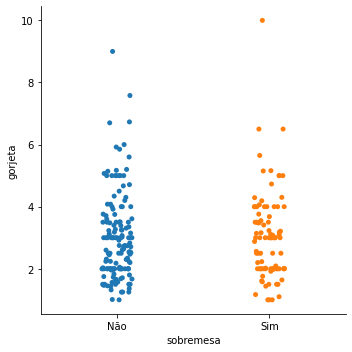

In [99]:
sns.catplot(x = 'sobremesa', y = 'gorjeta', data = dados)

### O relplot é ideal para fazer análise de variável quantitativa e categórica ao mesmo tempo

Os eixos X e Y ficam com as variáveis quantitativas, e a representação dos dados fica com a variável categórica

hue -> matiz, tonalidade, é a segmentação dos dados em cores

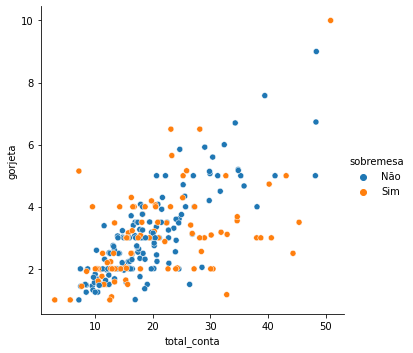

In [100]:
sns.relplot(x = 'total_conta', y = 'gorjeta', hue='sobremesa', data = dados)

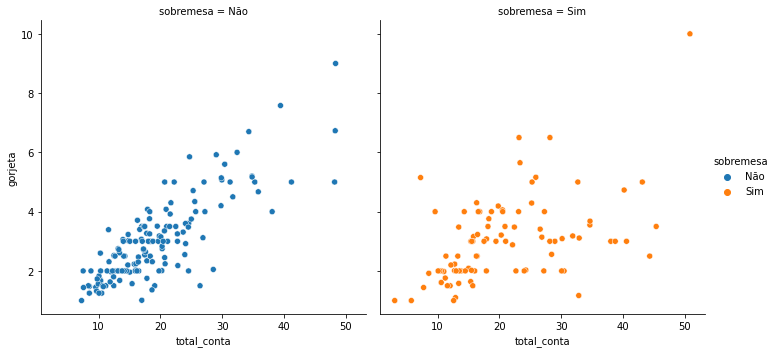

In [101]:
#Separando os gráficos
sns.relplot(x = 'total_conta', y = 'gorjeta', hue='sobremesa', col='sobremesa', data = dados)

### Linha de distribuição

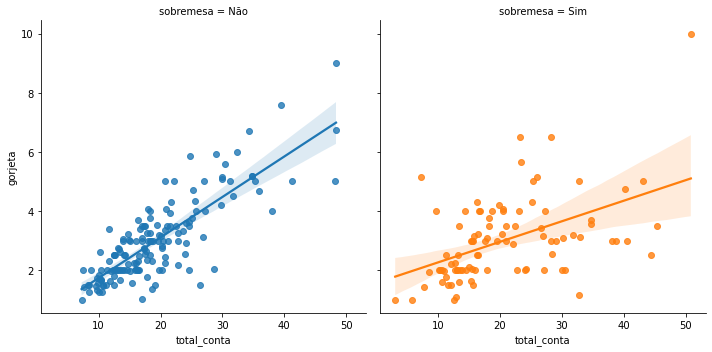

In [102]:
sns.lmplot(x='total_conta', y='gorjeta', hue='sobremesa', col='sobremesa', data = dados)

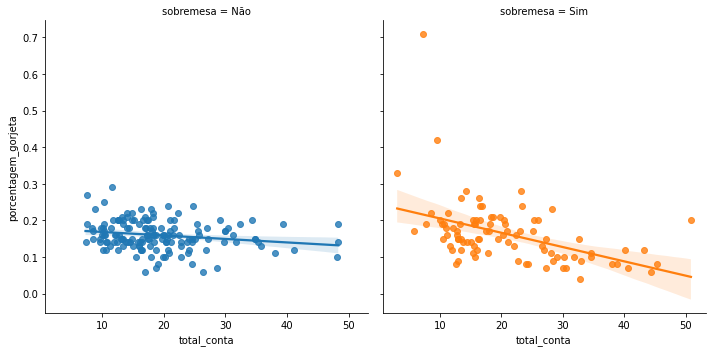

In [103]:
sns.lmplot(x='total_conta', y='porcentagem_gorjeta', hue='sobremesa', col='sobremesa', data = dados)

Visualmente podemos inferir que a gorjeta é menor quando o cliente pede sobremesa.

### Utilizando o gráfico de linhas

Adiciona apenas o "kind = line" no método do relplot

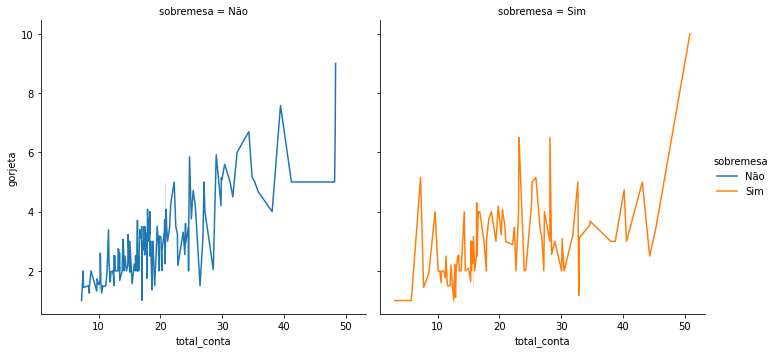

In [104]:
sns.relplot(x = 'total_conta', y = 'gorjeta', hue='sobremesa', col='sobremesa', kind = 'line', data = dados)

# Teste de Hipótese

In [105]:
from scipy.stats import ranksums

In [106]:
#Quem pediu sobremesa
porc_sobremesa_sim = dados.query("sobremesa == 'Sim'").porcentagem_gorjeta
porc_sobremesa_sim

56     0.08
58     0.16
60     0.16
61     0.14
62     0.18
       ... 
234    0.19
236    0.08
237    0.04
240    0.07
241    0.09
Name: porcentagem_gorjeta, Length: 93, dtype: float64

In [107]:
porc_sobremesa_nao = dados.query("sobremesa == 'Não'").porcentagem_gorjeta
porc_sobremesa_nao

0      0.06
1      0.16
2      0.17
3      0.14
4      0.15
       ... 
235    0.12
238    0.13
239    0.20
242    0.10
243    0.16
Name: porcentagem_gorjeta, Length: 151, dtype: float64

### O ranksums retorna dados estatístico de dois ou mais grupos

In [108]:
r = ranksums(porc_sobremesa_sim, porc_sobremesa_nao)
r

RanksumsResult(statistic=-0.6331073145314825, pvalue=0.5266635660124415)

In [109]:
print(f"O valor do pvalue é: {r.pvalue}")

O valor do pvalue é: 0.5266635660124415


O p-value representa a probabilidade daquela amostra ter acontecido dentro da população. Se a chance é pequena, geralmente p-value < 0,05, representa que um evento muito raro aconteceu, então optamos por descartar a hipótese nula, e dizer que ela pode não ser verdade. Porém como o valor foi de 0.5%, consideramos que é muito alto e, portanto, consideramos a hipótese nula (onde nenhum grupo - que pediu e não pediu sobremesa - tem interferência considerável no valor da gorjeta)

# Análise do dia da semana

In [110]:
dados.dia_semana.unique()

array(['Domingo', 'Sábado', 'Quinta', 'Sexta'], dtype=object)

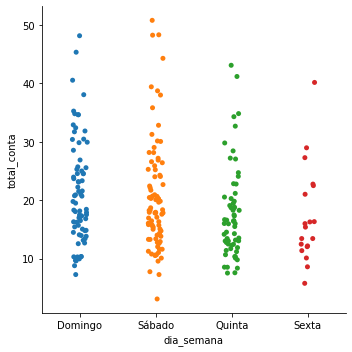

In [111]:
sns.catplot(x='dia_semana', y='total_conta', hue = 'dia_semana', data = dados)

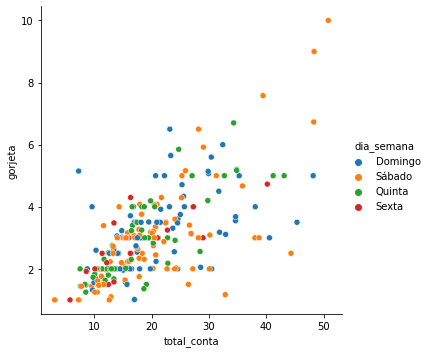

In [112]:
sns.relplot(x='total_conta', y='gorjeta', hue='dia_semana', data = dados)

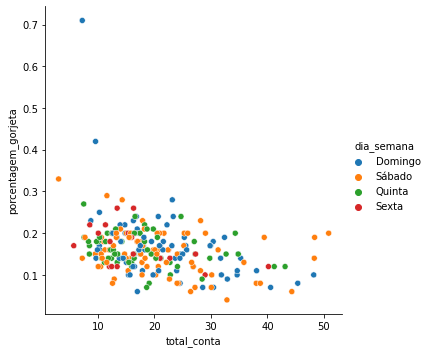

In [113]:
sns.relplot(x='total_conta', y='porcentagem_gorjeta', hue='dia_semana', data = dados)

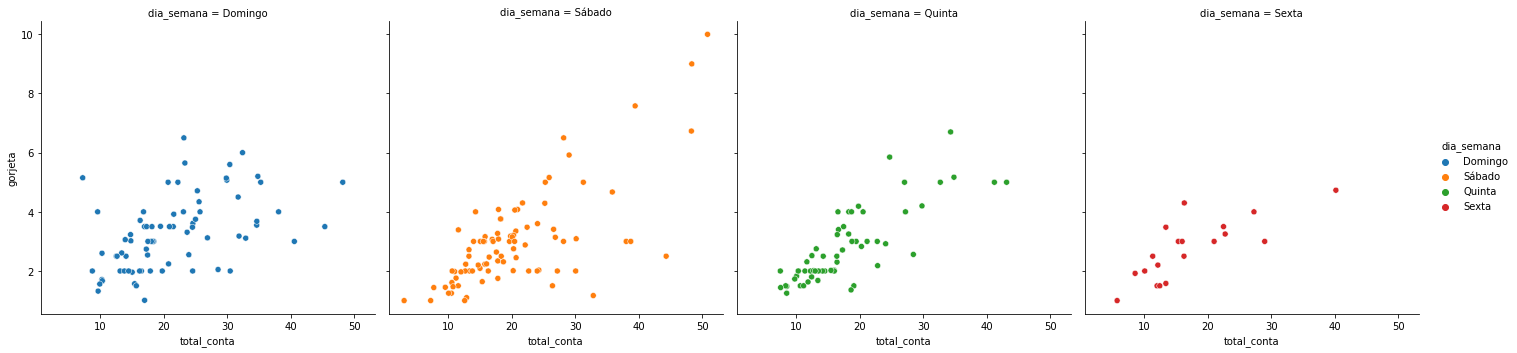

In [114]:
sns.relplot(x='total_conta', y='gorjeta', hue='dia_semana', col = 'dia_semana', data = dados)

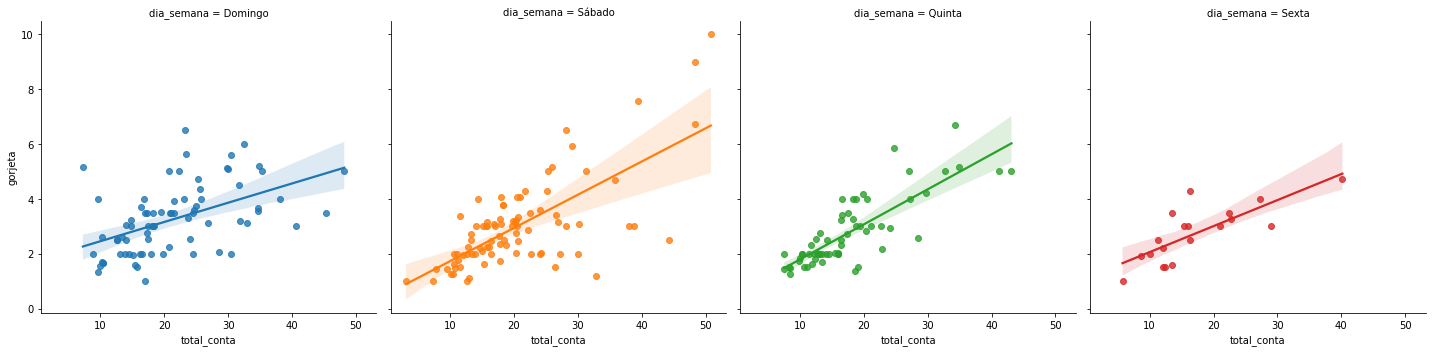

In [115]:
sns.lmplot(x='total_conta', y='gorjeta', hue='dia_semana', col='dia_semana', data = dados)

## Média de gorjeta por dia da semana

In [116]:
media_geral_gorjeta = dados.gorjeta.mean()
print(f"Média geral de gorjeta é: {media_geral_gorjeta}")

Média geral de gorjeta é: 2.9982786885245902


In [117]:
#Média geral por dia da semana
dados.groupby('dia_semana').mean().reset_index()

,dia_semana,total_conta,gorjeta,qnt_pessoas,porcentagem_gorjeta
0,Domingo,21.410000,3.255132,2.842105,0.166974
1,Quinta,17.682742,2.771452,2.451613,0.161129
2,Sexta,17.151579,2.734737,2.105263,0.169474
3,Sábado,20.441379,2.993103,2.517241,0.153678


In [138]:
dados.groupby('dia_semana')[['total_conta', 'gorjeta', 'porcentagem_gorjeta']].mean().reset_index()
#Ou da seguinte forma:
#dados.groupby('dia_semana').mean()[['total_conta', 'gorjeta', 'porcentagem_gorjeta']].reset_index()

,dia_semana,total_conta,gorjeta,porcentagem_gorjeta
0,Domingo,21.410000,3.255132,0.166974
1,Quinta,17.682742,2.771452,0.161129
2,Sexta,17.151579,2.734737,0.169474
3,Sábado,20.441379,2.993103,0.153678


In [122]:
#Frequência de pessoas por dia
dados.groupby('dia_semana')['qnt_pessoas'].sum()

dia_semana
Domingo    216
Quinta     152
Sexta       40
Sábado     219
Name: qnt_pessoas, dtype: int64

In [123]:
#Frequência de dia registrado
dados.dia_semana.value_counts()

Sábado     87
Domingo    76
Quinta     62
Sexta      19
Name: dia_semana, dtype: int64

# Teste de Hipótese

Se o valor da conta é maior no domingo que no sábado


In [135]:
domingo = dados.query("dia_semana == 'Domingo'").total_conta
domingo

0      16.99
1      10.34
2      21.01
3      23.68
4      24.59
       ...  
186    20.90
187    30.46
188    18.15
189    23.10
190    15.69
Name: total_conta, Length: 76, dtype: float64

In [136]:
sabado = dados.query("dia_semana == 'Sábado'").total_conta
sabado

19     20.65
20     17.92
21     20.29
22     15.77
23     39.42
       ...  
238    35.83
239    29.03
240    27.18
241    22.67
242    17.82
Name: total_conta, Length: 87, dtype: float64

In [132]:
r = ranksums(domingo, sabado)
r

RanksumsResult(statistic=0.9198084864360142, pvalue=0.3576728477868443)

In [137]:
print(f"O resultado é: {r.pvalue}")

O resultado é: 0.5266635660124415


Como o valor o pvalue é maior que 0.05, consideramos a hipótese nula: o valor da conta no domingo não é discrepante com o valor da conta no sábado

# Análise da hora do dia

In [140]:
dados.head(2)

,total_conta,gorjeta,sobremesa,dia_semana,hora,qnt_pessoas,porcentagem_gorjeta
0,16.99,1.01,Não,Domingo,Janta,2,0.06
1,10.34,1.66,Não,Domingo,Janta,3,0.16


In [141]:
dados.hora.unique()

array(['Janta', 'Almoço'], dtype=object)

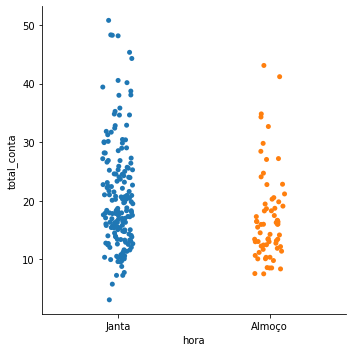

In [142]:
sns.catplot(x='hora', y='total_conta', hue='hora', data=dados)

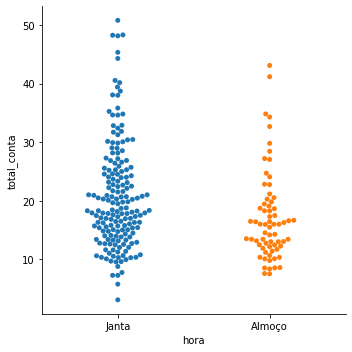

In [147]:
#swarm = enxame
sns.catplot(x='hora', y='total_conta', hue='hora', kind = 'swarm', data=dados)

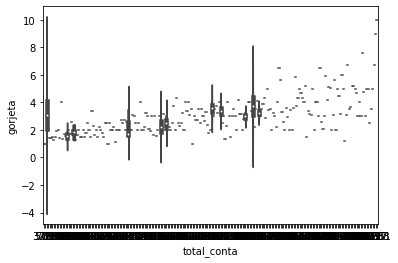

In [157]:
#Violino
sns.violinplot(x='total_conta', y='gorjeta', data = dados)
plt.show()

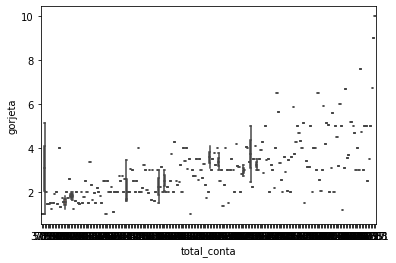

In [160]:
sns.boxplot(x='total_conta', y='gorjeta', data = dados)
plt.show()

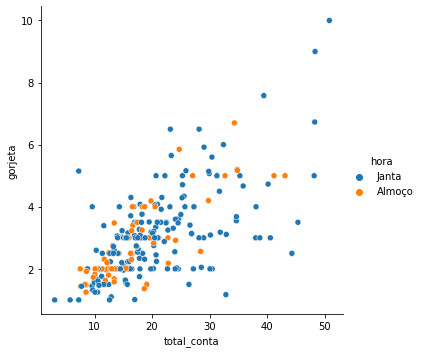

In [161]:
sns.relplot(x='total_conta', y='gorjeta', hue='hora', data = dados)

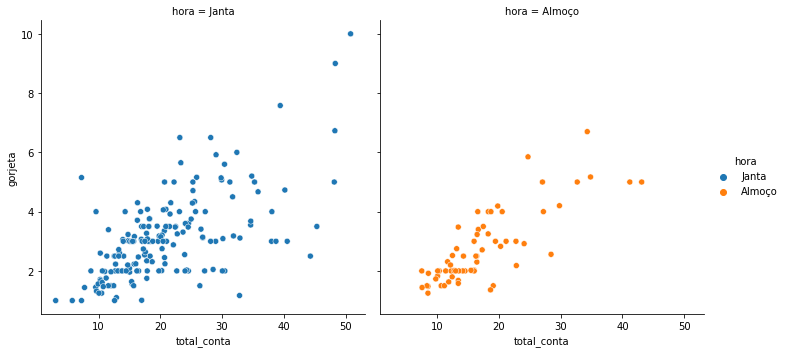

In [144]:
sns.relplot(x='total_conta', y='gorjeta', hue='hora', col='hora', data = dados)

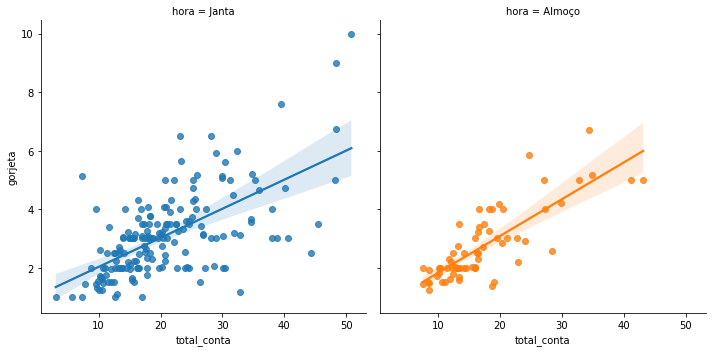

In [162]:
sns.lmplot(x='total_conta', y='gorjeta', hue='hora', col='hora', data = dados)

In [163]:
#Histograma
valor_almoco = dados.query("hora == 'Almoço'").total_conta
valor_almoco

77     27.20
78     22.76
79     17.29
80     19.44
81     16.66
       ...  
222     8.58
223    15.98
224    13.42
225    16.27
226    10.09
Name: total_conta, Length: 68, dtype: float64

In [165]:
valor_janta = dados.query("hora == 'Janta'").total_conta
valor_janta

0      16.99
1      10.34
2      21.01
3      23.68
4      24.59
       ...  
239    29.03
240    27.18
241    22.67
242    17.82
243    18.78
Name: total_conta, Length: 176, dtype: float64

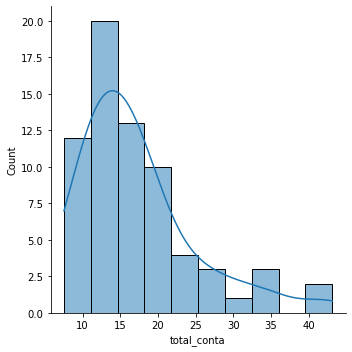

In [174]:
sns.displot(valor_almoco, kde=True)
plt.show()

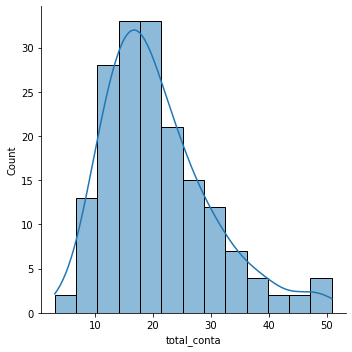

In [175]:
sns.displot(valor_janta, kde=True)

# Teste de Hipótese

O valor da conta no almoço é diferente do valor da conta na janta?

In [178]:
r3 = ranksums(valor_almoco, valor_janta)

In [179]:
print(f"O valor do p-value é: {r3.pvalue}")

O valor do p-value é: 0.0011791039723641672


O valor do p-value é de 0.0011, muito abaixo do limite de 5% (0.05) que consideramos para descartar ou não a hipótese nula. Nesse caso, o valor da conta do almoço é sim diferente do valor da conta na janta.